In [590]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [608]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2016 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2012 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2010 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2007 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2014 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2021 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2009 matches.csv


In [532]:
df_2007 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2007 matches.csv")
df_2010 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2010 matches.csv")
df_2016 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2016 matches.csv")
df_2012 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2012 matches.csv")
df_2014 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2014 matches.csv")
df_2009 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2009 matches.csv")
df_2021 = pd.read_csv("/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2021 matches.csv")

In [533]:
df_2007.head()

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205/6(20 overs),South Africa,South Africa won by 8 wickets,Chris Gayle
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73(16.5 overs),New Zealand,New Zealand won by 9 wickets,Mark Gillespie
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120(19.5 overs),Pakistan,Pakistan won by 51 runs,Shahid Afridi
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138/9(20 overs),Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164/8(20 overs),Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful


In [534]:
df1 = df_2007.append(df_2009)
df1 = df1.append(df_2010)
df1 = df1.append(df_2012)
df1 = df1.append(df_2014)
df1 = df1.append(df_2016)
df1 = df1.append(df_2021)

In [535]:
df1 = df1.drop(["Group/Super Eights/Semi Final/Final"] , axis = 1)

In [536]:
df1.head()

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205/6(20 overs),South Africa,South Africa won by 8 wickets,Chris Gayle
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73(16.5 overs),New Zealand,New Zealand won by 9 wickets,Mark Gillespie
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120(19.5 overs),Pakistan,Pakistan won by 51 runs,Shahid Afridi
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138/9(20 overs),Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164/8(20 overs),Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful


## DATA CLEANING
Cleaning the features

In [537]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 44
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Match No                223 non-null    int64 
 1   Date                    223 non-null    object
 2   Group/Semi Final/Final  196 non-null    object
 3   Match Between           223 non-null    object
 4   Venue                   223 non-null    object
 5   Winning Team Score      221 non-null    object
 6   Losing Team Score       219 non-null    object
 7   Winner Team             218 non-null    object
 8   Result                  223 non-null    object
 9   Player Of The Match     218 non-null    object
dtypes: int64(1), object(9)
memory usage: 19.2+ KB


In [538]:
df1.isnull().sum()

Match No                   0
Date                       0
Group/Semi Final/Final    27
Match Between              0
Venue                      0
Winning Team Score         2
Losing Team Score          4
Winner Team                5
Result                     0
Player Of The Match        5
dtype: int64

In [539]:
df1["Group/Semi Final/Final"] = df1["Group/Semi Final/Final"].fillna(df1["Group/Semi Final/Final"].mode()[0])

In [540]:
df1.head()

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205/6(20 overs),South Africa,South Africa won by 8 wickets,Chris Gayle
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73(16.5 overs),New Zealand,New Zealand won by 9 wickets,Mark Gillespie
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120(19.5 overs),Pakistan,Pakistan won by 51 runs,Shahid Afridi
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138/9(20 overs),Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164/8(20 overs),Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful


In [541]:
df1["Losing Team Score"]= df1["Losing Team Score"].astype(str)
df1["Losing Team Score"] = df1["Losing Team Score"].apply(lambda x:x.split("/")[0])
df1["Losing Team Score"] = df1["Losing Team Score"].apply(lambda x:x.split("(")[0])


In [542]:
df1.head()

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
0,1,2007-11-09,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208/2(17.4 overs),205,South Africa,South Africa won by 8 wickets,Chris Gayle
1,2,2007-12-09,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74/1(7.4 overs),73,New Zealand,New Zealand won by 9 wickets,Mark Gillespie
2,3,2007-12-09,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171/9(20 overs),120,Pakistan,Pakistan won by 51 runs,Shahid Afridi
3,4,2007-12-09,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139/5(19.5 overs),138,Zimbabwe,Zimbabwe won by 5 wickets,Brendan Taylor
4,5,2007-09-13,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165/4(18 overs),164,Bangladesh,Bangladesh won by 6 wickets,Mohammad Ashraful


In [543]:
df1["Winning Team Score"]= df1["Winning Team Score"].astype(str)
df1["Winning Team Score"] = df1["Winning Team Score"].apply(lambda x:x.split("/")[0])
df1["Winning Team Score"] = df1["Winning Team Score"].apply(lambda x:x.split("(")[0])


In [544]:
df1 = df1.drop(df1[df1["Winning Team Score"]=="nan"].index)


In [545]:
df1 = df1.drop(df1[df1["Losing Team Score"]=="nan"].index)

In [546]:
df1["Losing Team Score"] = df1["Losing Team Score"].astype(int)

In [547]:
df1["Winning Team Score"] = df1["Winning Team Score"].astype(int)

In [548]:
df1["Result"] = df1["Result"].apply(lambda x : x.split("by ")[1:2]).str.get(0)

df1["Result"] = df1["Result"].astype(str)

df1["Result"] = df1["Result"].apply(lambda x : x.split("(")[0])

In [549]:
df1 = df1.drop(df1[df1["Result"] == "nan"].index)

In [550]:
df1["Runs&wicket"]= df1["Result"].apply(lambda x : x.split(" ")[1:2])
df1["Runs&wicket"] = df1["Runs&wicket"].str.get(0)
df1["Runs&wicket"] = df1["Runs&wicket"].apply(lambda x : 1 if x == "wickets" else 0 )

In [551]:
df1.Result = df1["Result"].apply(lambda x : x.split(" ")[0])

In [552]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [553]:
df1["day"] =  df1["Date"].dt.day
df1["month"] = df1["Date"].dt.month
df1["year"] = df1["Date"].dt.year

In [554]:
df1 = df1.drop("Date" , axis = 1)

In [555]:
df1.head()

,Match No,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Runs&wicket,day,month,year
0,1,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208,205,South Africa,8,Chris Gayle,1,9,11,2007
1,2,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74,73,New Zealand,9,Mark Gillespie,1,9,12,2007
2,3,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171,120,Pakistan,51,Shahid Afridi,0,9,12,2007
3,4,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139,138,Zimbabwe,5,Brendan Taylor,1,9,12,2007
4,5,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165,164,Bangladesh,6,Mohammad Ashraful,1,13,9,2007


### VISUALIZATION
The data is visulize to get better insights

Text(0, 0.5, 'no.of time man of the match')

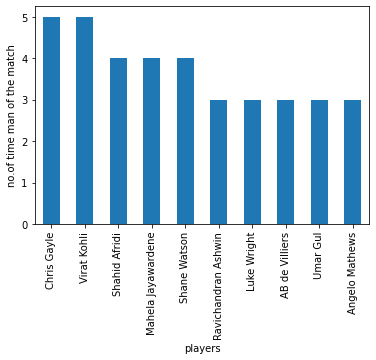

In [556]:
df1["Player Of The Match"].value_counts().nlargest(10).plot.bar()
plt.xlabel("players")
plt.ylabel("no.of time man of the match")

In [557]:
df1.head()

,Match No,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Runs&wicket,day,month,year
0,1,Group A,South Africa vs West Indies,"The Wanderers Stadium, Johannesburg",208,205,South Africa,8,Chris Gayle,1,9,11,2007
1,2,Group C,Kenya vs New Zealand,"Kingsmead, Durban",74,73,New Zealand,9,Mark Gillespie,1,9,12,2007
2,3,Group D,Pakistan vs Scotland,"Kingsmead, Durban",171,120,Pakistan,51,Shahid Afridi,0,9,12,2007
3,4,Group B,Australia vs Zimbabwe,"Newlands, Cape Town",139,138,Zimbabwe,5,Brendan Taylor,1,9,12,2007
4,5,Group A,Bangladesh vs West Indies,"The Wanderers Stadium, Johannesburg",165,164,Bangladesh,6,Mohammad Ashraful,1,13,9,2007


<AxesSubplot:ylabel='Winning Team Score'>

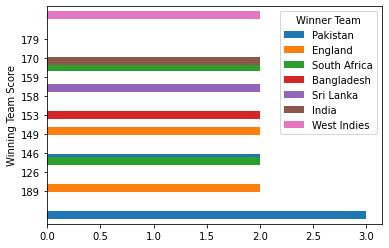

In [558]:
df1.groupby("Winning Team Score")["Winner Team"].value_counts().nlargest(10).unstack().plot.barh(width = 3)




/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'South Africa'),
  Text(1, 0, 'New Zealand'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'Zimbabwe'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'England'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Sri Lanka'),
  Text(8, 0, 'India'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'West Indies'),
  Text(11, 0, 'Nepal'),
  Text(12, 0, 'Ireland'),
  Text(13, 0, 'Afghanistan'),
  Text(14, 0, 'Oman'),
  Text(15, 0, 'Scotland'),
  Text(16, 0, 'Sri lanka')])

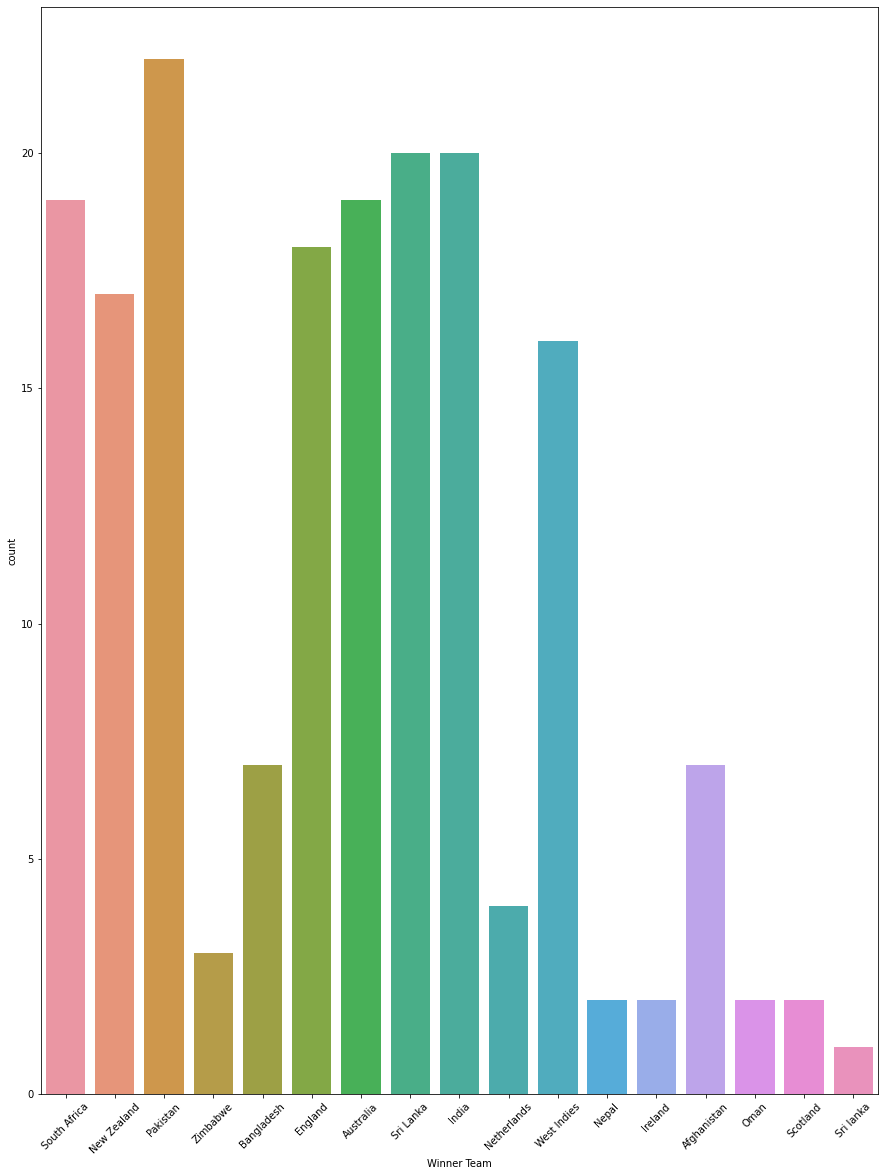

In [559]:
plt.figure(figsize=(15,20))
sns.countplot(df1["Winner Team"])
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Winning Team Score', ylabel='Density'>

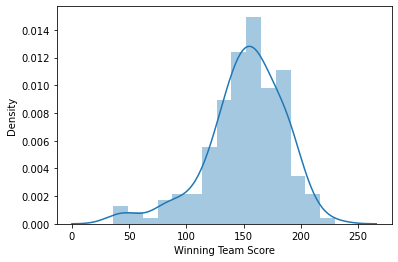

In [560]:
sns.distplot(df1['Winning Team Score'] ,kde= True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Losing Team Score', ylabel='Density'>

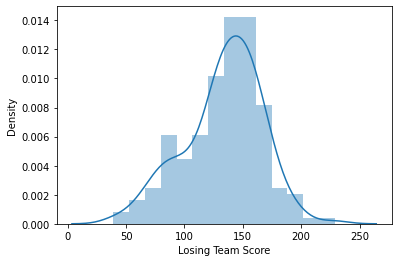

In [561]:
sns.distplot(df1["Losing Team Score"],kde= True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '')

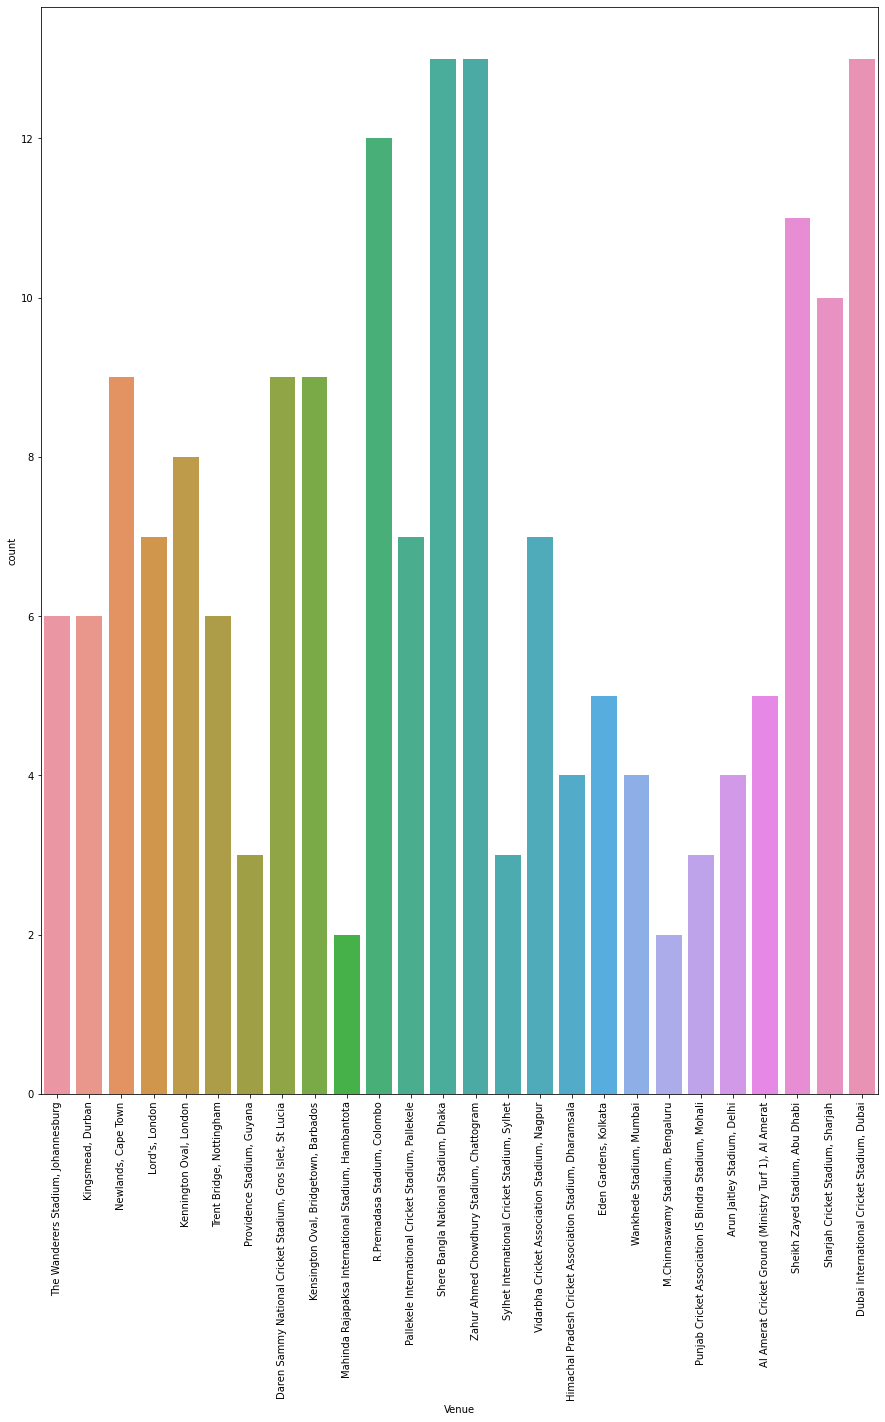

In [562]:
plt.figure(figsize=(15,20))
sns.countplot(df1.Venue)
plt.xticks(rotation = 90)
plt.title("")

# ENCODING
By sklearn labelling

In [563]:
df1.columns

Index(['Match No', 'Group/Semi Final/Final', 'Match Between', 'Venue',
       'Winning Team Score', 'Losing Team Score', 'Winner Team', 'Result',
       'Player Of The Match', 'Runs&wicket', 'day', 'month', 'year'],
      dtype='object')

In [566]:
lab= LabelEncoder()
enc = lab.fit_transform(df1["Group/Semi Final/Final"])
df1["Group/Semi Final/Final"] = enc

lab= LabelEncoder()
enc = lab.fit_transform(df1["Match Between"])
df1['Match Between'] = enc

lab= LabelEncoder()
enc = lab.fit_transform(df1['Venue'])
df1['Venue'] = enc

lab= LabelEncoder()
enc = lab.fit_transform(df1['Winner Team'])
df1['Winner Team'] = enc

lab= LabelEncoder()
enc = lab.fit_transform(df1['Player Of The Match'])
df1['Player Of The Match'] = enc

In [567]:
df1.head()

,Match No,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Runs&wicket,day,month,year
0,1,5,94,21,208,205,12,8,20,1,9,11,2007
1,2,7,59,8,74,73,8,9,62,1,9,12,2007
2,3,8,81,8,171,120,10,51,97,0,9,12,2007
3,4,6,17,12,139,138,16,5,15,1,9,12,2007
4,5,5,29,21,165,164,2,6,71,1,13,9,2007


In [568]:
x = df1.drop(["Winner Team"],axis = 1)
y=df1["Winner Team"]

In [569]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=123, shuffle=True)

In [571]:
x_train.head()

,Match No,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Result,Player Of The Match,Runs&wicket,day,month,year
25,26,1,102,6,158,101,57,109,0,19,6,2009
23,24,10,105,2,109,105,6,103,1,5,11,2010
26,27,11,94,23,123,122,3,63,1,25,3,2016
4,5,7,51,2,186,172,14,106,0,5,2,2010
5,6,6,40,12,188,138,50,53,0,13,9,2007


In [588]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5.0, random_state=1)
evaluate_model(ridge)

pred_test = ridge.predict(x_test)

In [586]:
pred_df = pd.DataFrame({"actual":y_test.values,"prediction":pred_test})

In [587]:
pred_df

,actual,prediction
0,13,14.054431
1,12,11.099834
2,3,5.775664
3,2,7.115588
4,15,8.705237
...,...,...
68,3,5.617077
69,12,15.177278
70,10,8.425274
71,10,4.394309


In [606]:
print("MSE : " , metrics.mean_absolute_error(y_test, pred_test))
print("r2 Score : " , metrics.r2_score(y_test, pred_test))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MSE :  3.1867447170222074
r2 Score :  0.30237385018684193
RMSE :  4.057802056389896
